In [151]:
import numpy as np 
import scipy as sc 
from scipy.stats import multivariate_normal
from numpy.linalg import inv
from numpy import linalg as LA
from matplotlib import pyplot as plt

In [303]:
# Sample  observed data x from a given multivariate normal
mean = [0.5, 0.2]
var = [[1,0.3],[0.3,0.5]]
x= np.random.multivariate_normal(mean, var,100)

# Initilize loading matrix that corresponds to the following PPCA model:
# x= Wz + epsilone, where epsilone ~ N(0, sigma**2*I), whre dim(z) = 1
W_in = np.array([[1,0]] )
W_in.shape
W_in = W_in.transpose()

W_in.shape

(2, 1)

In [304]:
# Compute the E-step
# x= Wz + epsilone, where epsilone ~ N(0, sigma**2*I)
def E_step(W, x, sigma):  
    A=np.matmul(inv(np.matmul(np.transpose(W),W) + sigma**2*np.eye(1)), np.transpose(W))
    z=np.transpose(np.matmul(A, np.transpose(x)))
    return z


In [305]:
# Compute the M-step
def M_step(x, z):
    A = inv(np.dot(np.transpose(z),z)) 
    W = np.dot(np.dot(np.transpose(x),z),A)
    return W

In [306]:
# EM algorithm for PPCA
def EM_PPCA(x, W,sigma, epsilone):
   
    while True:
        
        W_in = W
        z= E_step(W,x, sigma)
        W=M_step(x,z)
        if LA.norm(W-W_in)<= epsilone:
            break
            
    return W
    


In [307]:
W_opt  = EM_PPCA(x, W_in,0.1, 0.00005)
W_opt.shape
W_opt

array([[183.83395262],
       [ 78.77256135]])

In [308]:
W_opt.shape

(2, 1)

In [309]:
# Encoding 
z= E_step(W_opt, x, 0.1)
z  # posterior mean of p(z_i|x_i)

array([[ 0.00842522],
       [ 0.0011184 ],
       [-0.00503213],
       [ 0.00897454],
       [ 0.0094215 ],
       [ 0.00636677],
       [-0.00467986],
       [ 0.00666766],
       [-0.00210382],
       [ 0.00661292],
       [ 0.00083648],
       [-0.00129456],
       [-0.01520038],
       [ 0.00650454],
       [-0.00226987],
       [ 0.00957272],
       [-0.00475464],
       [ 0.00166945],
       [ 0.00403151],
       [-0.00245789],
       [ 0.01468991],
       [ 0.00815414],
       [ 0.00457426],
       [ 0.00760987],
       [-0.00048175],
       [ 0.00457784],
       [ 0.00566714],
       [ 0.00166124],
       [ 0.00305145],
       [ 0.00192924],
       [ 0.00754973],
       [ 0.00463116],
       [-0.00406535],
       [ 0.00042436],
       [ 0.00763927],
       [ 0.01146014],
       [ 0.00808458],
       [ 0.01211375],
       [ 0.0004321 ],
       [ 0.00235567],
       [ 0.001642  ],
       [ 0.00306172],
       [ 0.00301278],
       [ 0.00845658],
       [-0.00030675],
       [-0

In [310]:
# Decoding
x_hat  = np.transpose(np.dot(W_opt, np.transpose(z)))

In [311]:
# plotting
def plot_ppca(x,x_hat, z, W):
    fig ,ax= plt.subplots()
    ax.scatter(x[:,0],x[:,1], color='r', label ='original data ')
    ax.scatter(x_hat[:,0],x_hat[:,1], color='gray', label='Projected data in latent space')
    origin = np.array([[0],[0]])
    ax.quiver(*origin, W_opt[0,:], W_opt[1,:], color='black', scale=100, scale_units='xy', label='first PPCA component')
    plt.xlabel("x1")
    plt.ylabel("x2")
    leg = ax.legend(loc='upper left', frameon=False);
    #plt.scatter()
    
    fig.show()


C:\Users\Yakin\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


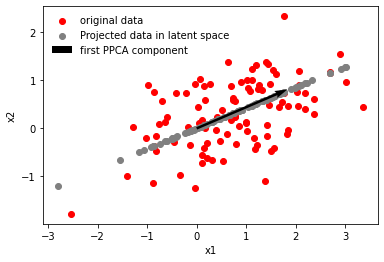

In [312]:
plot_ppca(x,x_hat,z, W_opt)